# Vaccine Project

## Business Understanding

The client is a leader in the field of health care.  The client has resources at their disposal that can be used to encourage non-vaccinated persons to become vaccinated. It would be beneficial to the client to know what groups of persons are less likely to be vaccinated in order to make the best use of the client's resources.  Therefore, it would be helpful for the client to have a model that could predict which persons are less likely to be vaccinated based on various known factors, likely related to the person's background, views and behaviors, and also it would be helfpul to know more generally which of these factors leads a group to be less or more likely to be vaccinated.  This model and knowledge would facilitate efforts to reach persons individually and as groups. 

## Data Understanding

The data comes from the National 2009 H1N1 Flu Survey conducted by the United States after the outbreak of the virus in 2009.  The survey covers various topics included one's background, views and behaviors.  The survey also covers whether one has been vaccinated against the H1N1 virus, which will be the target variable for this project. 
More specifically, the potential predictor variables include socio-economic related factors, views about vaccines, and health-related behaviors and statuses (e.g., health insurance and doctor recommendation.)

About half the features are categorical in nature as opposed to numerical. (Of the float and integer type features, about half are binary/categorical.)  The columns with most missing data have about 10,000 of 27,000 missing.  About 21% of respondents received the H1N1 vaccine. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
dataX = pd.read_csv('./data/training_set_features.csv') 
datay = pd.read_csv('./data/training_set_labels.csv')
dataX.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [3]:
datay.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


Combining the feature and label data into one dataframe: 

In [4]:
data = pd.concat([datay, dataX], axis = 1)

In [5]:
data = data.drop(['respondent_id'], axis=1)

In [6]:
data.head()

,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_vaccine                 26707 non-null  int64  
 1   seasonal_vaccine             26707 non-null  int64  
 2   h1n1_concern                 26615 non-null  float64
 3   h1n1_knowledge               26591 non-null  float64
 4   behavioral_antiviral_meds    26636 non-null  float64
 5   behavioral_avoidance         26499 non-null  float64
 6   behavioral_face_mask         26688 non-null  float64
 7   behavioral_wash_hands        26665 non-null  float64
 8   behavioral_large_gatherings  26620 non-null  float64
 9   behavioral_outside_home      26625 non-null  float64
 10  behavioral_touch_face        26579 non-null  float64
 11  doctor_recc_h1n1             24547 non-null  float64
 12  doctor_recc_seasonal         24547 non-null  float64
 13  chronic_med_cond

In [8]:
data.describe()

,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,0.212454,0.465608,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,0.409052,0.498825,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,0.000000,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [9]:
data.iloc[:,8:17].describe()

,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance
count,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000
mean,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972
std,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
50%,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
75%,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


Of the float and integer type features, about half are binary/categorical.  The columns with most missing data have about 10,000 of 27,000 missing.  About 21% of respondents received the H1N1 vaccine. 

Some of the columns are not self-explanatory: census_msa, hhs_geo_region. 

In [10]:
data.census_msa.value_counts()

MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census_msa, dtype: int64

Metropolitan Statistical Area, it seems that these designation roughly mean: {MSA, Not Principle  City: suburban; MSA, Principle City: urban; Non-MSA: rural }

hhs_geo_region, employment_industry, and employment_occupation are coded as random strings.  Thus without decoding, they will provide little information.

In [11]:
data.hhs_geo_region.value_counts()

lzgpxyit    4297
fpwskwrf    3265
qufhixun    3102
oxchjgsf    2859
kbazzjca    2858
bhuqouqj    2846
mlyzmhmf    2243
lrircsnp    2078
atmpeygn    2033
dqpwygqj    1126
Name: hhs_geo_region, dtype: int64

In [12]:
data.employment_industry.value_counts()

fcxhlnwr    2468
wxleyezf    1804
ldnlellj    1231
pxcmvdjn    1037
atmlpfrs     926
arjwrbjb     871
xicduogh     851
mfikgejo     614
vjjrobsf     527
rucpziij     523
xqicxuve     511
saaquncn     338
cfqqtusy     325
nduyfdeo     286
mcubkhph     275
wlfvacwt     215
dotnnunm     201
haxffmxo     148
msuufmds     124
phxvnwax      89
qnlwzans      13
Name: employment_industry, dtype: int64

In [13]:
data.employment_occupation.value_counts()

xtkaffoo    1778
mxkfnird    1509
emcorrxb    1270
cmhcxjea    1247
xgwztkwe    1082
hfxkjkmi     766
qxajmpny     548
xqwwgdyp     485
kldqjyjy     469
uqqtjvyb     452
tfqavkke     388
ukymxvdu     372
vlluhbov     354
oijqvulv     344
ccgxvspp     341
bxpfxfdn     331
haliazsg     296
rcertsgn     276
xzmlyyjv     248
dlvbwzss     227
hodpvpew     208
dcjcmpih     148
pvmttkik      98
Name: employment_occupation, dtype: int64

In [14]:
data.education.value_counts()

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: education, dtype: int64

In [15]:
data.sex.value_counts()

Female    15858
Male      10849
Name: sex, dtype: int64

In [16]:
data.race.value_counts()

White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64

In [17]:
data.age_group.value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64

In [18]:
data.income_poverty.value_counts()

<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_poverty, dtype: int64

The survey seems to be fairly cross-sectional in terms of various background factors. 

<AxesSubplot:>

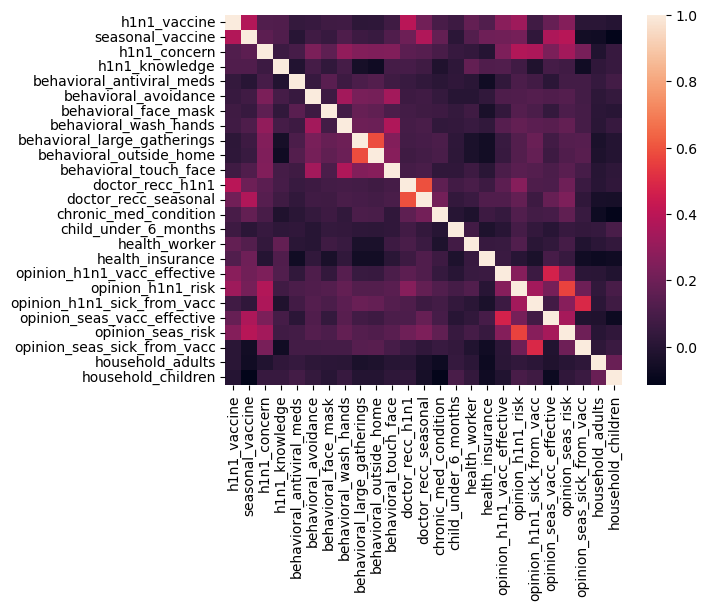

In [19]:
sns.heatmap(data.corr())

In [20]:
datawd = pd.get_dummies(data)

In [21]:
datawd.head()

,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

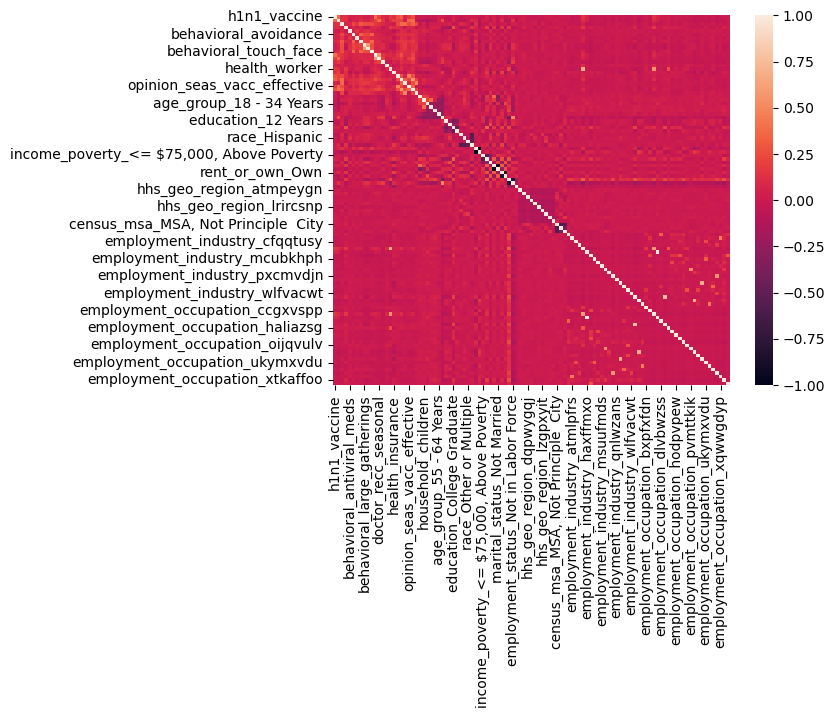

In [22]:
sns.heatmap(datawd.corr())

Find all correlations over .25:

In [23]:
datawdcor = datawd.corr()

In [24]:
corrs=[]

for i in range(len(datawdcor)):#iter over rows
    for j in range(len(datawdcor)):#iter over cols
        if abs((datawdcor[datawdcor.columns[i]][datawdcor.columns[j]])>.25) & (datawdcor[datawdcor.columns[i]][datawdcor.columns[j]] !=1.0):
            tup = datawdcor[datawdcor.columns[i]][datawdcor.columns[j]],datawdcor.columns[i], datawdcor.columns[j]
            corrs.append(tup)
corrs    
    

[(0.37714265306144523, 'h1n1_vaccine', 'seasonal_vaccine'),
 (0.39389048123870213, 'h1n1_vaccine', 'doctor_recc_h1n1'),
 (0.26934700167297715, 'h1n1_vaccine', 'opinion_h1n1_vacc_effective'),
 (0.32326466034778245, 'h1n1_vaccine', 'opinion_h1n1_risk'),
 (0.2585710215427774, 'h1n1_vaccine', 'opinion_seas_risk'),
 (0.37714265306144523, 'seasonal_vaccine', 'h1n1_vaccine'),
 (0.3691900954159413, 'seasonal_vaccine', 'doctor_recc_seasonal'),
 (0.3618747273514622, 'seasonal_vaccine', 'opinion_seas_vacc_effective'),
 (0.390105713384758, 'seasonal_vaccine', 'opinion_seas_risk'),
 (0.2935651485017993, 'h1n1_concern', 'behavioral_wash_hands'),
 (0.2550310154400835, 'h1n1_concern', 'behavioral_large_gatherings'),
 (0.3770328126230567, 'h1n1_concern', 'opinion_h1n1_risk'),
 (0.3600697383652842, 'h1n1_concern', 'opinion_h1n1_sick_from_vacc'),
 (0.3339895008732969, 'h1n1_concern', 'opinion_seas_risk'),
 (0.26208698574014516, 'h1n1_knowledge', 'education_College Graduate'),
 (0.3381295192965343, 'behav

In [25]:
#Convert list of tuples to DF.
corrlist =[]
var1 =[]
var2 =[]
for i in corrs:
    corrlist.append(i[0])
    var1.append(i[1])
    var2.append(i[2])
corrdf = pd.DataFrame([corrlist,var1, var2]).transpose()        

Find signficant correlations with target variable.

In [26]:
corrdf.loc[(corrdf[1]=='h1n1_vaccine')|(corrdf[2]=='h1n1_vaccine')]

,0,1,2
0,0.377143,h1n1_vaccine,seasonal_vaccine
1,0.39389,h1n1_vaccine,doctor_recc_h1n1
2,0.269347,h1n1_vaccine,opinion_h1n1_vacc_effective
3,0.323265,h1n1_vaccine,opinion_h1n1_risk
4,0.258571,h1n1_vaccine,opinion_seas_risk
5,0.377143,seasonal_vaccine,h1n1_vaccine
29,0.39389,doctor_recc_h1n1,h1n1_vaccine
37,0.269347,opinion_h1n1_vacc_effective,h1n1_vaccine
41,0.323265,opinion_h1n1_risk,h1n1_vaccine
54,0.258571,opinion_seas_risk,h1n1_vaccine


Significant correlations are: Doctor reccomendation, seasonal vaccine, opinion of virus risk, opinion of vaccine effective, opinion of flu risk.

Check these potential predictors correlations amongst each other

In [27]:
corrdf.tail(50)

,0,1,2
72,0.285041,income_poverty_Below Poverty,rent_or_own_Rent
73,0.366782,marital_status_Married,household_adults
74,0.302536,marital_status_Married,"income_poverty_> $75,000"
75,0.326638,marital_status_Married,rent_or_own_Own
76,0.296563,marital_status_Not Married,rent_or_own_Rent
77,0.260684,rent_or_own_Own,"income_poverty_> $75,000"
78,0.326638,rent_or_own_Own,marital_status_Married
79,0.285041,rent_or_own_Rent,income_poverty_Below Poverty
80,0.296563,rent_or_own_Rent,marital_status_Not Married
81,0.277575,employment_status_Employed,"income_poverty_> $75,000"


The potential predictor variables are not highly correlated amonst each other.

# Data preparation

Separate predictor variables and target variables from unused data, fill in missing values and then split both into train and test sets.  

In [59]:
from sklearn.model_selection import train_test_split

In [62]:

dataPT= datawd.loc[:,['doctor_recc_h1n1', 'opinion_h1n1_risk', 'opinion_h1n1_vacc_effective', 'h1n1_vaccine']]

In [63]:
dataPT.describe()

,doctor_recc_h1n1,opinion_h1n1_risk,opinion_h1n1_vacc_effective,h1n1_vaccine
count,24547.000000,26319.000000,26316.000000,26707.000000
mean,0.220312,2.342566,3.850623,0.212454
std,0.414466,1.285539,1.007436,0.409052
min,0.000000,1.000000,1.000000,0.000000
25%,0.000000,1.000000,3.000000,0.000000
50%,0.000000,2.000000,4.000000,0.000000
75%,0.000000,4.000000,5.000000,0.000000
max,1.000000,5.000000,5.000000,1.000000


In [54]:
#len(X.loc[X.doctor_recc_h1n1.notna() & X.opinion_h1n1_risk.notna() & X.opinion_h1n1_vacc_effective.notna()])

24246

In [57]:
#dataC = pd.concat([X, y], axis =1)#Concatenate for purpose of dropping missing values.

In [114]:
dataPT = dataPT.dropna(axis=0)

In [115]:
dataPT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24246 entries, 0 to 26706
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   doctor_recc_h1n1             24246 non-null  float64
 1   opinion_h1n1_risk            24246 non-null  float64
 2   opinion_h1n1_vacc_effective  24246 non-null  float64
 3   h1n1_vaccine                 24246 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 947.1 KB


In [116]:
y = dataPT['h1n1_vaccine']
X= dataPT.drop('h1n1_vaccine',axis=1)

In [117]:
np.shape(y), np.shape(X)

((24246,), (24246, 3))

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [119]:
np.shape(X_test), np.shape(y_train)

((6062, 3), (18184,))

# Data Modeling

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
reg = LogisticRegression(C=1e5, solver = "liblinear") 

In [122]:
reg.fit(X_train, y_train)

LogisticRegression(C=100000.0, solver='liblinear')

In [123]:
reg.score(X_train, y_train)

0.8184117905851298

In [124]:
reg.score(X_test, y_test)

0.8173870009897723